In [1]:
import numpy as np
from scipy import integrate
import pandas as pd
from matplotlib import pyplot as plt
import glob

In [2]:
plt.style.use('science')

SMALL_SIZE = 9
MEDIUM_SIZE = 10
BIGGER_SIZE = 14

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=8)    # legend fontsize
plt.rc('lines', linewidth=0.5)
# plt.rc('legend', titlesize=5)
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [3]:
coloursk = ['#1955b0','#3D9970' ,'#FFDC00']
coloursa = ['#1955b0','#3D9970' ,'#FFDC00', '#FF4136']
# colours = ['#ebe831','#ffae2f' ,'#ff725c']
leg_labelsk = ['100', '1000' , '1880']
leg_labelsa = ['100', '1000' , '1880', '2440']

hbc2 = (0.197e-13)**2

In [4]:
kheatfiles = glob.glob('*Kheating.dat')
kheat_data = {}
for file in kheatfiles:
    kheat_data[file.replace('_Kheating.dat', '')] = pd.read_csv(file, sep="\t", header = None)
    
aheatfiles = glob.glob('*Aheating.dat')
aheat_data = {}
for file in aheatfiles:
    aheat_data[file.replace('_Aheating.dat', '')] = pd.read_csv(file, sep="\t", header = None)
    
kheatfilesFD = glob.glob('*KheatingFD.dat')
kheat_dataFD = {}
for file in kheatfilesFD:
    kheat_dataFD[file.replace('_KheatingFD.dat', '')] = pd.read_csv(file, sep="\t", header = None)
    
aheatfilesFD = glob.glob('*AheatingFD.dat')
aheat_dataFD = {}
for file in aheatfilesFD:
    aheat_dataFD[file.replace('_AheatingFD.dat', '')] = pd.read_csv(file, sep="\t", header = None)
    
FSfiles = glob.glob('*ISheating.dat')
FS_data = {}
for file in FSfiles:
    FS_data[file.replace('_ISheating.dat', '')] = pd.read_csv(file, sep="\t", header = None)
    
Darwin_files = glob.glob('*_Darwin.dat')
DDD_data = {}
for file in Darwin_files:
    DDD_data[file.replace('_Darwin.dat', '')] = pd.read_csv(file, sep="\t", header = None)

Xenon_files = glob.glob('*_Xenon.dat')
XDD_data = {}
for file in Xenon_files:
    XDD_data[file.replace('_Xenon.dat', '')] = pd.read_csv(file, sep="\t", header = None)
    




In [5]:
v0 = 230e3/3e8
cs = 11.265
cp = -0.00123756
cv = 3.
ca = 0.428
ct = -0.564
mn = 0.939

def q2(mx):
    return (4*v0**2 *mx**2)/ (1 + mx/mn)**2

def q4(mx):
    return (5.333*v0**2 *mx**2)/ (1 + mx/mn)**2

def l1(mx):
    return ((2*np.pi*(mx/0.939 + 1)**2)/ (cs**2 * mx**2 ))**0.25

def l2(mx):
    return ((8*np.pi*(mx/0.939 + 1)**2)/ (cs**2 *q2(mx)))**0.25

def l3(mx):
    return ((8*np.pi*(mx/0.939 + 1)**2)/ (cp**2 *q2(mx)*(mx/mn)**2))**0.25

def l4(mx):
    return ((32*np.pi*(mx/0.939 + 1)**2)/ (cp**2 *q4(mx)))**0.25

def l5(mx):
    return ((2*np.pi*(mx/0.939 + 1)**2)/ (cs**2 * mx**2 ))**0.25

def l6(mx):
    return ((8*np.pi*(mx/0.939 + 1)**2)/ (cv**2 * (4*mx**2 * v0**2 + ((mx/mn)**2 - 2*(mx/mn) -1)*q2(mx))))**0.25

def l7(mx):
    return ((8*np.pi*(mx/0.939 + 1)**2)/ (ca**2 * (4*mx**2 * v0**2 + ((mx/mn)**2 + 2*(mx/mn) -1)*q2(mx))))**0.25

def l8(mx):
    return ((np.pi*(2*mx/0.939 + 1)**2)/ (3*ca**2 *mx**2))**0.25

def l9(mx):
    return ((np.pi*(mx/0.939 + 1)**2)/ (6*ct**2 *mx**2))**0.25

def l10(mx):
    return ((2*np.pi*(mx/0.939 + 1)**2)/ (8*ct**2 * (4*mx**2 * v0**2 + ((mx/mn)**2 + 4*(mx/mn) +1)*q2(mx))))**0.25


In [6]:
def kinetic_heating_plots():

        
    fig, ax = plt.subplots(figsize = (8, 10), ncols=2, nrows =5, sharey = True, sharex = True, dpi = 300)
    fig.subplots_adjust(hspace=0, wspace=0)
    # fig.text(0.5, 0.09, '$m_\chi$ [GeV]', ha='center', va = 'center')
    # fig.text(0.04, 0.5, '$G^2$ [GeV$^{-4}$]', va='center', rotation='vertical')
    i=1
    for m, row in enumerate(ax):
        for n, col in enumerate(row):
            for j in range(len(kheat_data['d'+str(i)].columns))[1:]:
                col.loglog(kheat_data['d'+str(i)][0], kheat_data['d'+str(i)][j], coloursk[j-1], label = leg_labelsk[j-1])
                col.fill_between(kheat_data['d'+str(i)][0], kheat_data['d'+str(i)][j], color = coloursk[j-1], alpha = 0.08)
            
            col.text(0.08, 0.9, 'D'+str(i), ha='center', va='center', transform=col.transAxes)
            col.set_xlabel('$m_\chi$ [GeV]')
            col.set_xlim(10**(-4.8), 1e5)
            col.set_ylim(10**-3.5, 10**6.5)
            col.legend(loc = 'lower right', shadow = False).set_title(title = '$T^\infty$ [K]', prop={"size": 5})
            col.grid(b=True, which='major',  linestyle='--', alpha=0.2)
            if n ==0:
                col.set_ylabel('$\Lambda$ [GeV]')
            i+=1
    plt.savefig('Kheating_plots.pdf')
    plt.show()

def ann_heating_plots():

    fig, ax = plt.subplots(figsize = (8, 10), ncols=2, nrows =5, sharey = True, sharex = True, dpi = 300)
    fig.subplots_adjust(hspace=0, wspace=0)
    # fig.text(0.5, 0.09, '$m_\chi$ [GeV]', ha='center', va = 'center')
    # fig.text(0.04, 0.5, '$G^2$ [GeV$^{-4}$]', va='center', rotation='vertical')
    i=1
    for m, row in enumerate(ax):
        for n, col in enumerate(row):
            for j in range(len(aheat_data['d'+str(i)].columns))[1:]:
                col.loglog(aheat_data['d'+str(i)][0], aheat_data['d'+str(i)][j], coloursa[j-1], label = leg_labelsa[j-1])
                col.fill_between(aheat_data['d'+str(i)][0], aheat_data['d'+str(i)][j], color = coloursa[j-1], alpha = 0.08)
            
            col.text(0.08, 0.9, 'D'+str(i), ha='center', va='center', transform=col.transAxes)
            col.set_xlabel('$m_\chi$ [GeV]')
            col.set_xlim(10**(-4.8), 1e5)
            col.set_ylim(10**-3.5, 10**6.5)
            col.legend(loc = 'lower right', shadow = False).set_title(title = '$T^\infty$ [K]', prop={"size": 5})
            col.grid(b=True, which='major',  linestyle='--', alpha=0.2)
            if n ==0:
                col.set_ylabel('$\Lambda$ [GeV]')
            i+=1
    plt.savefig('Aheating_plots.pdf')
    plt.show()
    
def kinetic_heatingFD_plots():

    fig, ax = plt.subplots(figsize = (8, 10), ncols=2, nrows =5, sharey = row, sharex = True, dpi = 300)
    fig.subplots_adjust(hspace=0, wspace=0)
    # fig.text(0.5, 0.09, '$m_\chi$ [GeV]', ha='center', va = 'center')
    # fig.text(0.04, 0.5, '$G^2$ [GeV$^{-4}$]', va='center', rotation='vertical')
    i=1
    for m, row in enumerate(ax):
        for n, col in enumerate(row):
            for j in range(len(kheat_dataFD['d'+str(i)].columns))[1:]:
                col.loglog(kheat_dataFD['d'+str(i)][0], kheat_dataFD['d'+str(i)][j], coloursk[j-1], label = leg_labelsk[j-1])
                col.fill_between(kheat_dataFD['d'+str(i)][0], kheat_dataFD['d'+str(i)][j], color = coloursk[j-1], alpha = 0.08)
            
            col.text(0.08, 0.9, 'D'+str(i), ha='center', va='center', transform=col.transAxes)
            col.set_xlabel('$m_\chi$ [GeV]')
            col.set_xlim(10**(-4.8), 1e5)
            col.set_ylim(10**-3.5, 10**6.5)
            col.legend(loc = 'lower right', shadow = False).set_title(title = '$T^\infty$ [K]', prop={"size": 5})
            col.grid(b=True, which='major',  linestyle='--', alpha=0.2)
            if n ==0:
                col.set_ylabel('$\Lambda$ [GeV]')
            i+=1
    plt.savefig('KheatingFD_plots.pdf')
    plt.show()

def FS_heating_plots():

    IS_labs = ['100 K', '1000 K', '1400 K']
    IS_cols = ['#0098de','#c783e4' ,'#ff6e8d']

    fig, ax = plt.subplots(figsize = (8, 10), ncols=2, nrows =5, sharey = True, sharex = True, dpi = 300)
    fig.subplots_adjust(hspace=0, wspace=0)
    # fig.text(0.5, 0.09, '$m_\chi$ [GeV]', ha='center', va = 'center')
    # fig.text(0.04, 0.5, '$G^2$ [GeV$^{-4}$]', va='center', rotation='vertical')
    i=1
    for m, row in enumerate(ax):
        for n, col in enumerate(row):
            for j in range(len(FS_data['d'+str(i)].columns))[1:]:
                col.loglog(FS_data['d'+str(i)][0], FS_data['d'+str(i)][j], color = IS_cols[j-1], label = IS_labs[j-1])
                col.fill_between(FS_data['d'+str(i)][0], FS_data['d'+str(i)][j], color = coloursa[j-1], alpha = 0.08)
            
            col.loglog(DDD_data['SI'][0], (1/l1(DDD_data['SI'][0]))/(DDD_data['SI'][1]/hbc2)**0.25)
            col.text(0.08, 0.9, 'D'+str(i), ha='center', va='center', transform=col.transAxes)
            col.set_xlabel('$m_\chi$ [GeV]')
            col.set_xlim(10**(-4.8), 1e5)
            col.set_ylim(10**-3.5, 10**6.5)
            col.legend(loc = 'lower right', shadow = False).set_title(title = '$T^\infty$ [K]', prop={"size": 5})
            col.grid(b=True, which='major',  linestyle='--', alpha=0.2)
            if n ==0:
                col.set_ylabel('$\Lambda$ [GeV]')
            i+=1
    plt.savefig('FSheating_plots.pdf')
    plt.show()
    


In [7]:
def combined_heating_plots():
    kheatfiles = glob.glob('*Kheating.dat')

    kheat_data = {}

    for file in kheatfiles:
        kheat_data[file.replace('_Kheating.dat', '')] = pd.read_csv(file, sep="\t", header = None)
        
    aheatfiles = glob.glob('*Aheating.dat')

    aheat_data = {}

    for file in aheatfiles:
        aheat_data[file.replace('_Aheating.dat', '')] = pd.read_csv(file, sep="\t", header = None)
        
    fig, ax = plt.subplots(figsize = (6,9), ncols=2, nrows =5, sharey = True, sharex = True, dpi = 300)
    fig.subplots_adjust(hspace=0, wspace=0)
    
    
    ax[0,0].loglog(DDD_data['SI'][0], (1/l1(DDD_data['SI'][0]))/(DDD_data['SI'][1]/hbc2)**0.25, color = '#000000', label = 'Darwin')
    ax[0,1].loglog(DDD_data['SI'][0], (1/l2(DDD_data['SI'][0]))/(DDD_data['SI'][1]/hbc2)**0.25, color = '#000000', label = 'Darwin')
    ax[1,0].loglog(DDD_data['SD'][0], (1/l3(DDD_data['SD'][0]))/(DDD_data['SD'][1]/hbc2)**0.25, color = '#000000', label = 'Darwin')
    ax[1,1].loglog(DDD_data['SD'][0], (1/l4(DDD_data['SD'][0]))/(DDD_data['SD'][1]/hbc2)**0.25, color = '#000000', label = 'Darwin')
    ax[2,0].loglog(DDD_data['SI'][0], (1/l5(DDD_data['SI'][0]))/(DDD_data['SI'][1]/hbc2)**0.25, color = '#000000', label = 'Darwin')
    ax[2,1].loglog(DDD_data['SI'][0], (1/l6(DDD_data['SI'][0]))/(DDD_data['SI'][1]/hbc2)**0.25, color = '#000000', label = 'Darwin')
    ax[3,0].loglog(DDD_data['SD'][0], (1/l7(DDD_data['SD'][0]))/(DDD_data['SD'][1]/hbc2)**0.25, color = '#000000', label = 'Darwin')
    ax[3,1].loglog(DDD_data['SD'][0], (1/l8(DDD_data['SD'][0]))/(DDD_data['SD'][1]/hbc2)**0.25, color = '#000000', label = 'Darwin')
    ax[4,0].loglog(DDD_data['SD'][0], (1/l9(DDD_data['SD'][0]))/(DDD_data['SD'][1]/hbc2)**0.25, color = '#000000', label = 'Darwin')
    ax[4,1].loglog(DDD_data['SI'][0], (1/l10(DDD_data['SI'][0]))/(DDD_data['SI'][1]/hbc2)**0.25, color = '#000000', label = 'Darwin')

    ax[0,0].loglog(XDD_data['SI'][0], (1/l1(XDD_data['SI'][0]))/(XDD_data['SI'][1]/hbc2)**0.25, color = '#53b8e0', label = 'Xenon1T')
    ax[0,1].loglog(XDD_data['SI'][0], (1/l2(XDD_data['SI'][0]))/(XDD_data['SI'][1]/hbc2)**0.25, color = '#53b8e0', label = 'Xenon1T')
    ax[1,0].loglog(XDD_data['SD'][0], (1/l3(XDD_data['SD'][0]))/(XDD_data['SD'][1]/hbc2)**0.25, color = '#53b8e0', label = 'Xenon1T')
    ax[1,1].loglog(XDD_data['SD'][0], (1/l4(XDD_data['SD'][0]))/(XDD_data['SD'][1]/hbc2)**0.25, color = '#53b8e0', label = 'Xenon1T')
    ax[2,0].loglog(XDD_data['SI'][0], (1/l5(XDD_data['SI'][0]))/(XDD_data['SI'][1]/hbc2)**0.25, color = '#53b8e0', label = 'Xenon1T')
    ax[2,1].loglog(XDD_data['SI'][0], (1/l6(XDD_data['SI'][0]))/(XDD_data['SI'][1]/hbc2)**0.25, color = '#53b8e0', label = 'Xenon1T')
    ax[3,0].loglog(XDD_data['SD'][0], (1/l7(XDD_data['SD'][0]))/(XDD_data['SD'][1]/hbc2)**0.25, color = '#53b8e0', label = 'Xenon1T')
    ax[3,1].loglog(XDD_data['SD'][0], (1/l8(XDD_data['SD'][0]))/(XDD_data['SD'][1]/hbc2)**0.25, color = '#53b8e0', label = 'Xenon1T')
    ax[4,0].loglog(XDD_data['SD'][0], (1/l9(XDD_data['SD'][0]))/(XDD_data['SD'][1]/hbc2)**0.25, color = '#53b8e0', label = 'Xenon1T')
    ax[4,1].loglog(XDD_data['SI'][0], (1/l10(XDD_data['SI'][0]))/(XDD_data['SI'][1]/hbc2)**0.25, color = '#53b8e0', label = 'Xenon1T')
    
    i=1
    for m, row in enumerate(ax):
        for n, col in enumerate(row):
            for j in range(len(aheat_data['d'+str(i)].columns))[1:]:
                col.loglog(aheat_data['d'+str(i)][0], aheat_data['d'+str(i)][j], coloursa[j-1], label = leg_labelsa[j-1], linestyle = '-')
                col.fill_between(aheat_data['d'+str(i)][0],aheat_data['d'+str(i)][j], 1e-4, color = coloursa[j-1], alpha = 0.1)
            for l in range(len(kheat_data['d'+str(i)].columns))[1:]:
                col.loglog(kheat_data['d'+str(i)][0], kheat_data['d'+str(i)][l], coloursa[l-1] , label='_nolegend_',linestyle = ':')
                

#             col.fill_between(aheat_data['d'+str(i)][0],aheat_data['d'+str(i)][1], 1e-4, color = '#000000', alpha = 0.1)
            col.text(0.08, 0.9, 'D'+str(i), ha='center', va='center', transform=col.transAxes)
            col.set_xlabel('$m_\chi$ [GeV]')
            col.set_xlim(10**(-4.8), 1e5)
            col.set_ylim(1e-4, 1e7)
            col.grid(b=True, which='major',  linestyle='--', alpha=0.2)
            col.minorticks_on()
            if n ==0:
                col.set_ylabel('$\Lambda$ [GeV]')
            if n == 1:
                col.legend(loc = (1, 0.1), shadow = False).set_title(title = '$T^\infty$ [K]', prop={"size": 6})
            i+=1
            
    

            
            
    plt.savefig('com_heating_plots.pdf')
    plt.show()

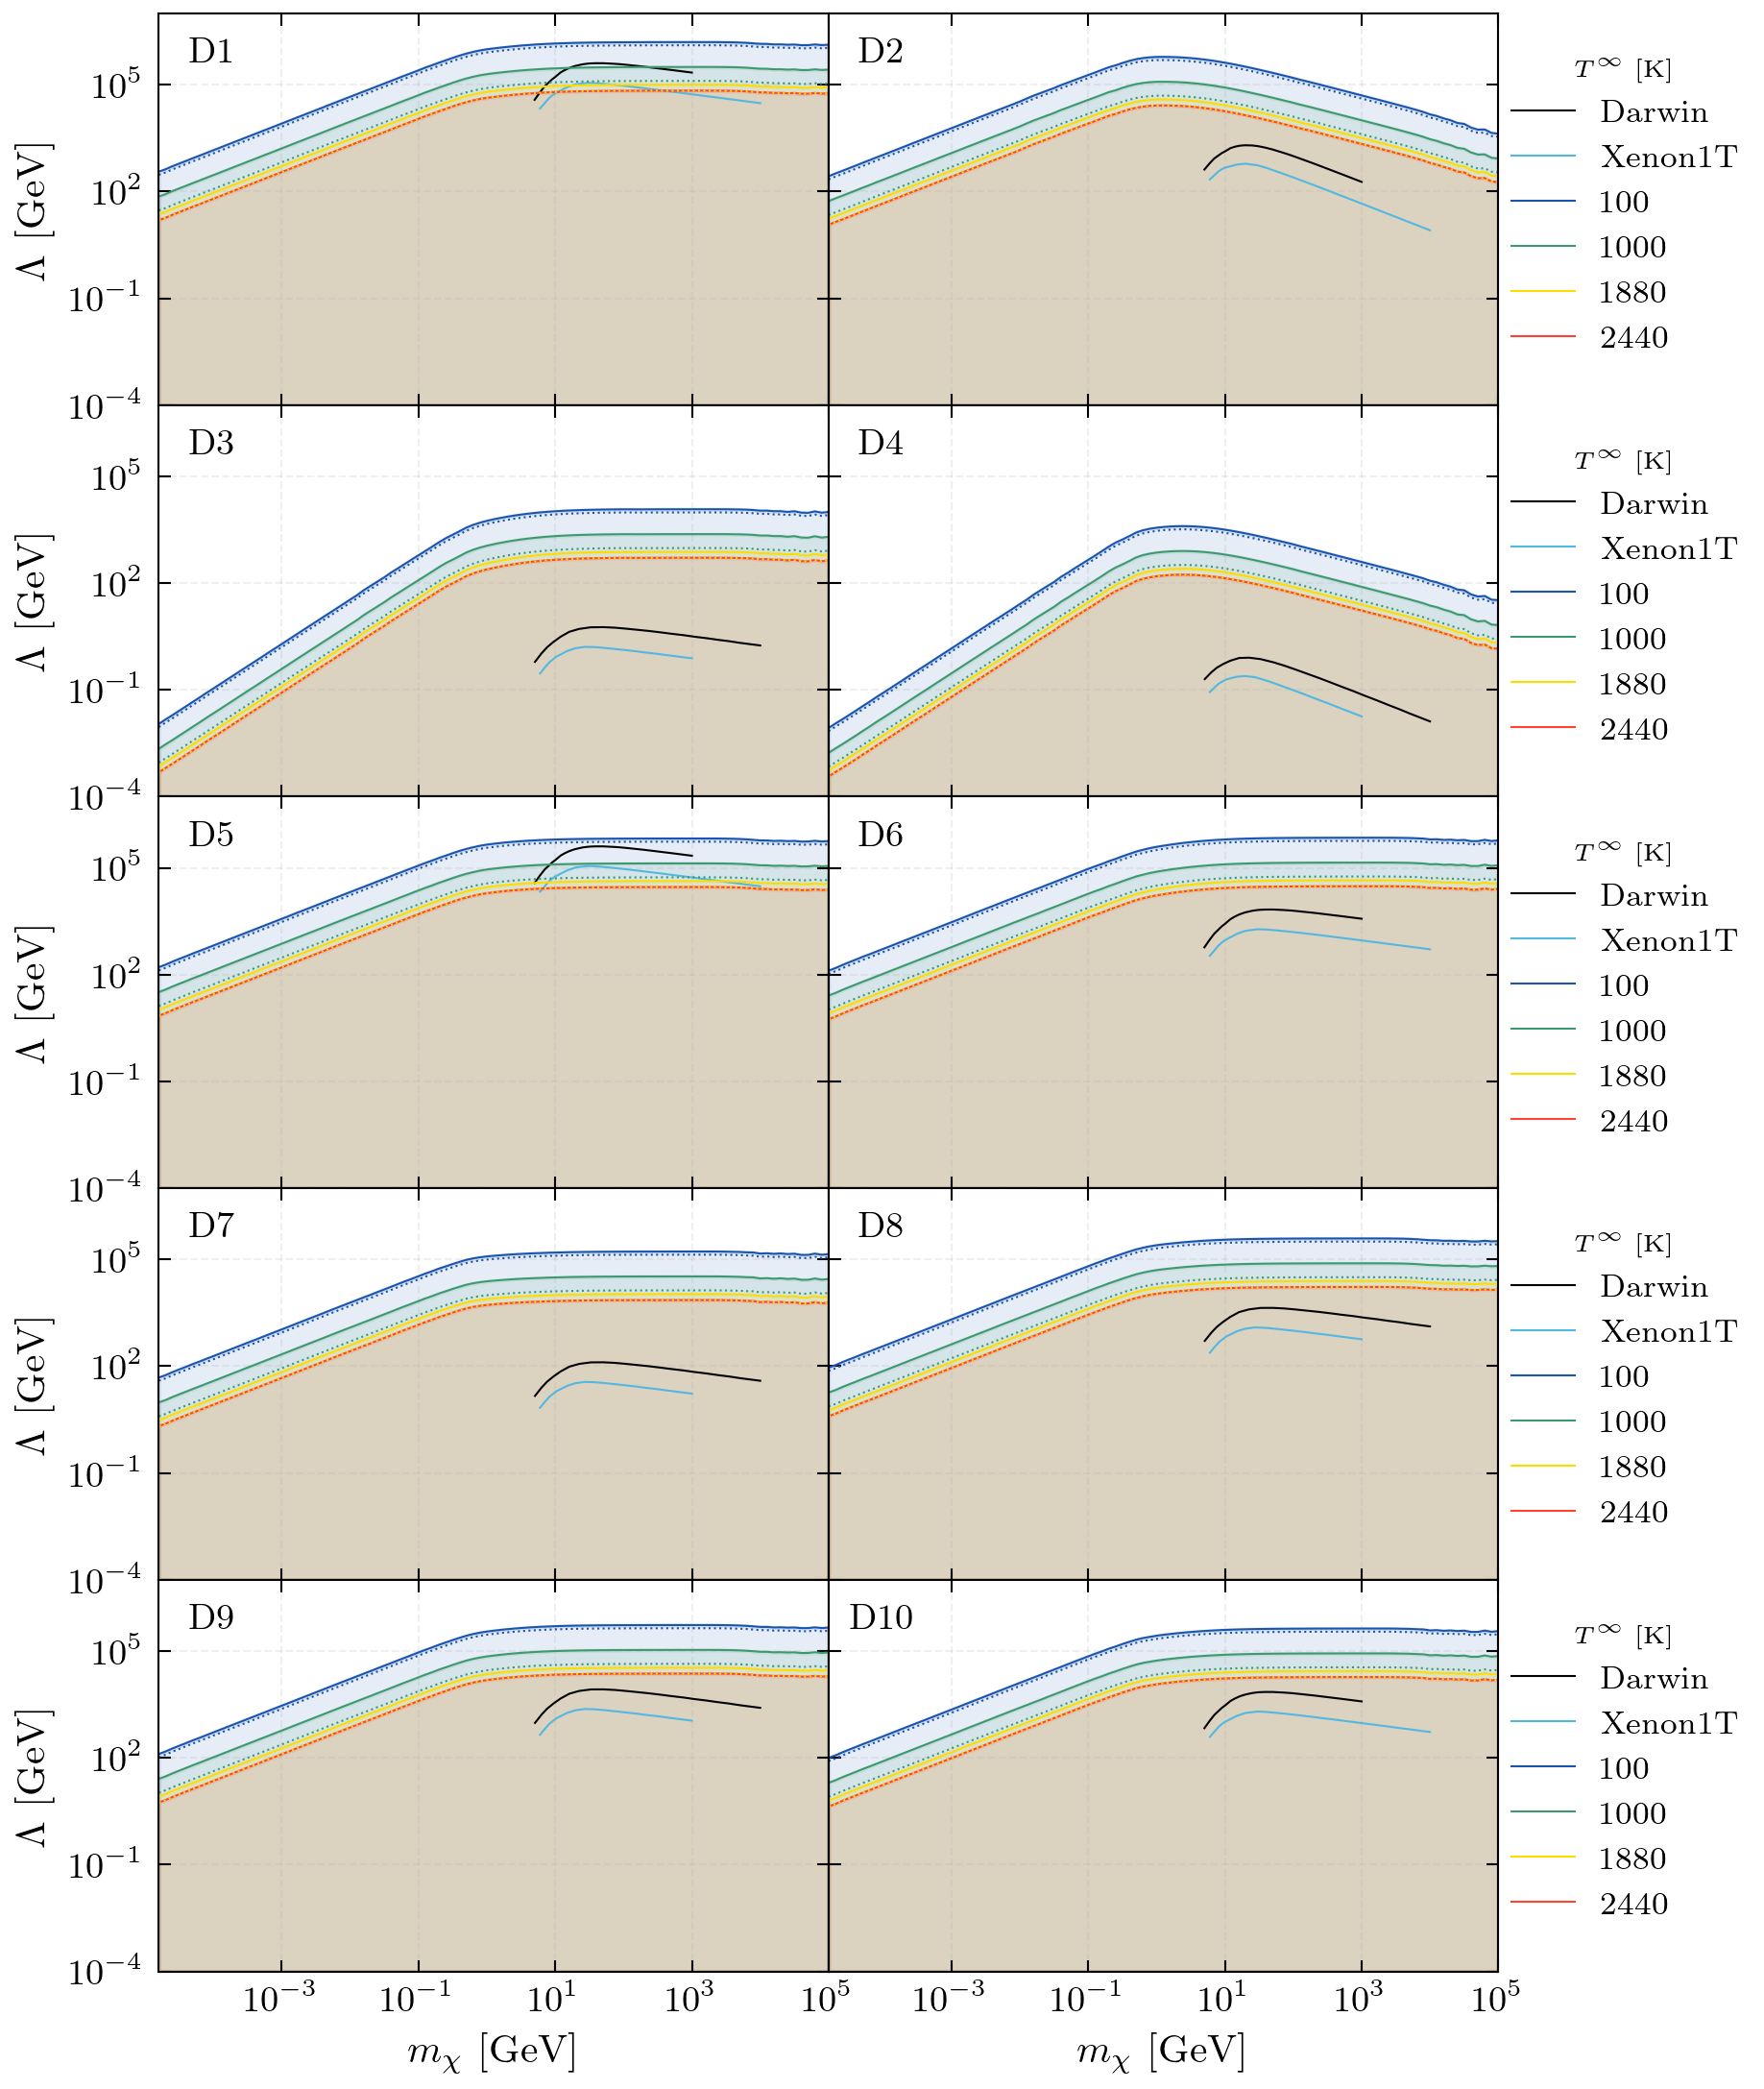

In [8]:
combined_heating_plots()

In [98]:

def completion():
    cols = ['#1955b0','#3D9970' ,'#FFDC00', '#FF4136']
    kheatfiles = glob.glob('*Kheating.dat')

    kheat_data = {}

    for file in kheatfiles:
        kheat_data[file.replace('_Kheating.dat', '')] = pd.read_csv(file, sep="\t", header = None)
        
    aheatfiles = glob.glob('*Aheating.dat')

    aheat_data = {}

    for file in aheatfiles:
        aheat_data[file.replace('_Aheating.dat', '')] = pd.read_csv(file, sep="\t", header = None)
        
    fig, ax = plt.subplots(figsize = (8, 4), ncols=2, nrows =2, sharey = True, sharex = True, dpi = 300)
    
    fig.subplots_adjust(hspace=0, wspace=0)
    
    for j in range(len(aheat_data['d1'].columns))[1:]:
        ax[0,0].loglog(aheat_data['d1'][0], aheat_data['d1'][j], cols[j-1], label = leg_labelsa[j-1], linestyle = '-')
    for l in range(len(kheat_data['d'+str(1)].columns))[1:]:
        ax[0,0].loglog(kheat_data['d'+str(1)][0], kheat_data['d'+str(1)][l], cols[l-1] , label='_nolegend_',linestyle = '--')
    ax[0,0].fill_between(aheat_data['d1'][0],aheat_data['d1'][1], 1e-4, color = '#000000', alpha = 0.1)
    ax[0,0].set_xlabel('$m_\chi$ [GeV]')
    ax[0,0].set_xlim(10**(-4.8), 1e5)
    ax[0,0].loglog(DDD_data['SI'][0], (1/l1(DDD_data['SI'][0]))/(DDD_data['SI'][1]/hbc2)**0.25, color = '#000000')
    ax[0,0].loglog(XDD_data['SI'][0], (1/l1(XDD_data['SI'][0]))/(XDD_data['SI'][1]/hbc2)**0.25, color = '#53b8e0')
    ax[0,0].set_ylabel('$\Lambda$ [GeV]')
    
    for j in range(len(aheat_data['d2'].columns))[1:]:
        ax[0,1].loglog(aheat_data['d2'][0], aheat_data['d2'][j], cols[j-1], label = leg_labelsa[j-1], linestyle = '-')
    for l in range(len(kheat_data['d'+str(2)].columns))[1:]:
        ax[0,1].loglog(kheat_data['d'+str(2)][0], kheat_data['d'+str(2)][l], cols[l-1] , label='_nolegend_',linestyle = '--')
    ax[0,1].fill_between(aheat_data['d2'][0],aheat_data['d2'][1], 1e-4, color = '#000000', alpha = 0.1)
    ax[0,1].set_xlabel('$m_\chi$ [GeV]')
    ax[0,1].set_xlim(10**(-4.8), 1e5)
    ax[0,1].loglog(DDD_data['SI'][0], (1/l2(DDD_data['SI'][0]))/(DDD_data['SI'][1]/hbc2)**0.25, color = '#000000')
    ax[0,1].loglog(XDD_data['SI'][0], (1/l2(XDD_data['SI'][0]))/(XDD_data['SI'][1]/hbc2)**0.25, color = '#53b8e0')
        
    for j in range(len(aheat_data['d'+str(8)].columns))[1:]:
        ax[1,0].loglog(aheat_data['d'+str(8)][0], aheat_data['d'+str(8)][j], cols[j-1], label = leg_labelsa[j-1], linestyle = '-')
    for l in range(len(kheat_data['d'+str(8)].columns))[1:]:
        ax[1,0].loglog(kheat_data['d'+str(8)][0], kheat_data['d'+str(8)][l], cols[l-1] , label='_nolegend_',linestyle = '--')
    ax[1,0].fill_between(aheat_data['d8'][0],aheat_data['d8'][1], 1e-4, color = '#000000', alpha = 0.1)
    ax[1,0].set_xlabel('$m_\chi$ [GeV]')
    ax[1,0].set_xlim(10**(-4.8), 1e5)
    ax[1,0].loglog(DDD_data['SD'][0], (1/l8(DDD_data['SD'][0]))/(DDD_data['SD'][1]/hbc2)**0.25, color = '#000000')
    ax[1,0].loglog(XDD_data['SD'][0], (1/l8(XDD_data['SD'][0]))/(XDD_data['SD'][1]/hbc2)**0.25, color = '#53b8e0')
    ax[1,0].set_ylabel('$\Lambda$ [GeV]')
    
    for j in range(len(aheat_data['d4'].columns))[1:]:
        ax[1,1].loglog(aheat_data['d4'][0], aheat_data['d4'][j], cols[j-1], label = leg_labelsa[j-1], linestyle = '-')
    for l in range(len(kheat_data['d'+str(4)].columns))[1:]:
        ax[1,1].loglog(kheat_data['d'+str(4)][0], kheat_data['d'+str(4)][l], cols[l-1] , label='_nolegend_',linestyle = '--')
    ax[1,1].fill_between(aheat_data['d4'][0],aheat_data['d4'][1], 1e-4, color = '#000000', alpha = 0.1)
    ax[1,1].set_xlabel('$m_\chi$ [GeV]')
    ax[1,1].set_xlim(10**(-4.8), 1e5)
    ax[1,1].loglog(DDD_data['SD'][0], (1/l4(DDD_data['SD'][0]))/(DDD_data['SD'][1]/hbc2)**0.25, color = '#000000')
    ax[1,1].loglog(XDD_data['SD'][0], (1/l4(XDD_data['SD'][0]))/(XDD_data['SD'][1]/hbc2)**0.25, color = '#53b8e0')
    ax[1,1].legend(loc = (1, 0.5), shadow = False).set_title(title = '$T^\infty$ [K]', prop={"size": 8})
    
    plt.savefig('limit.png')

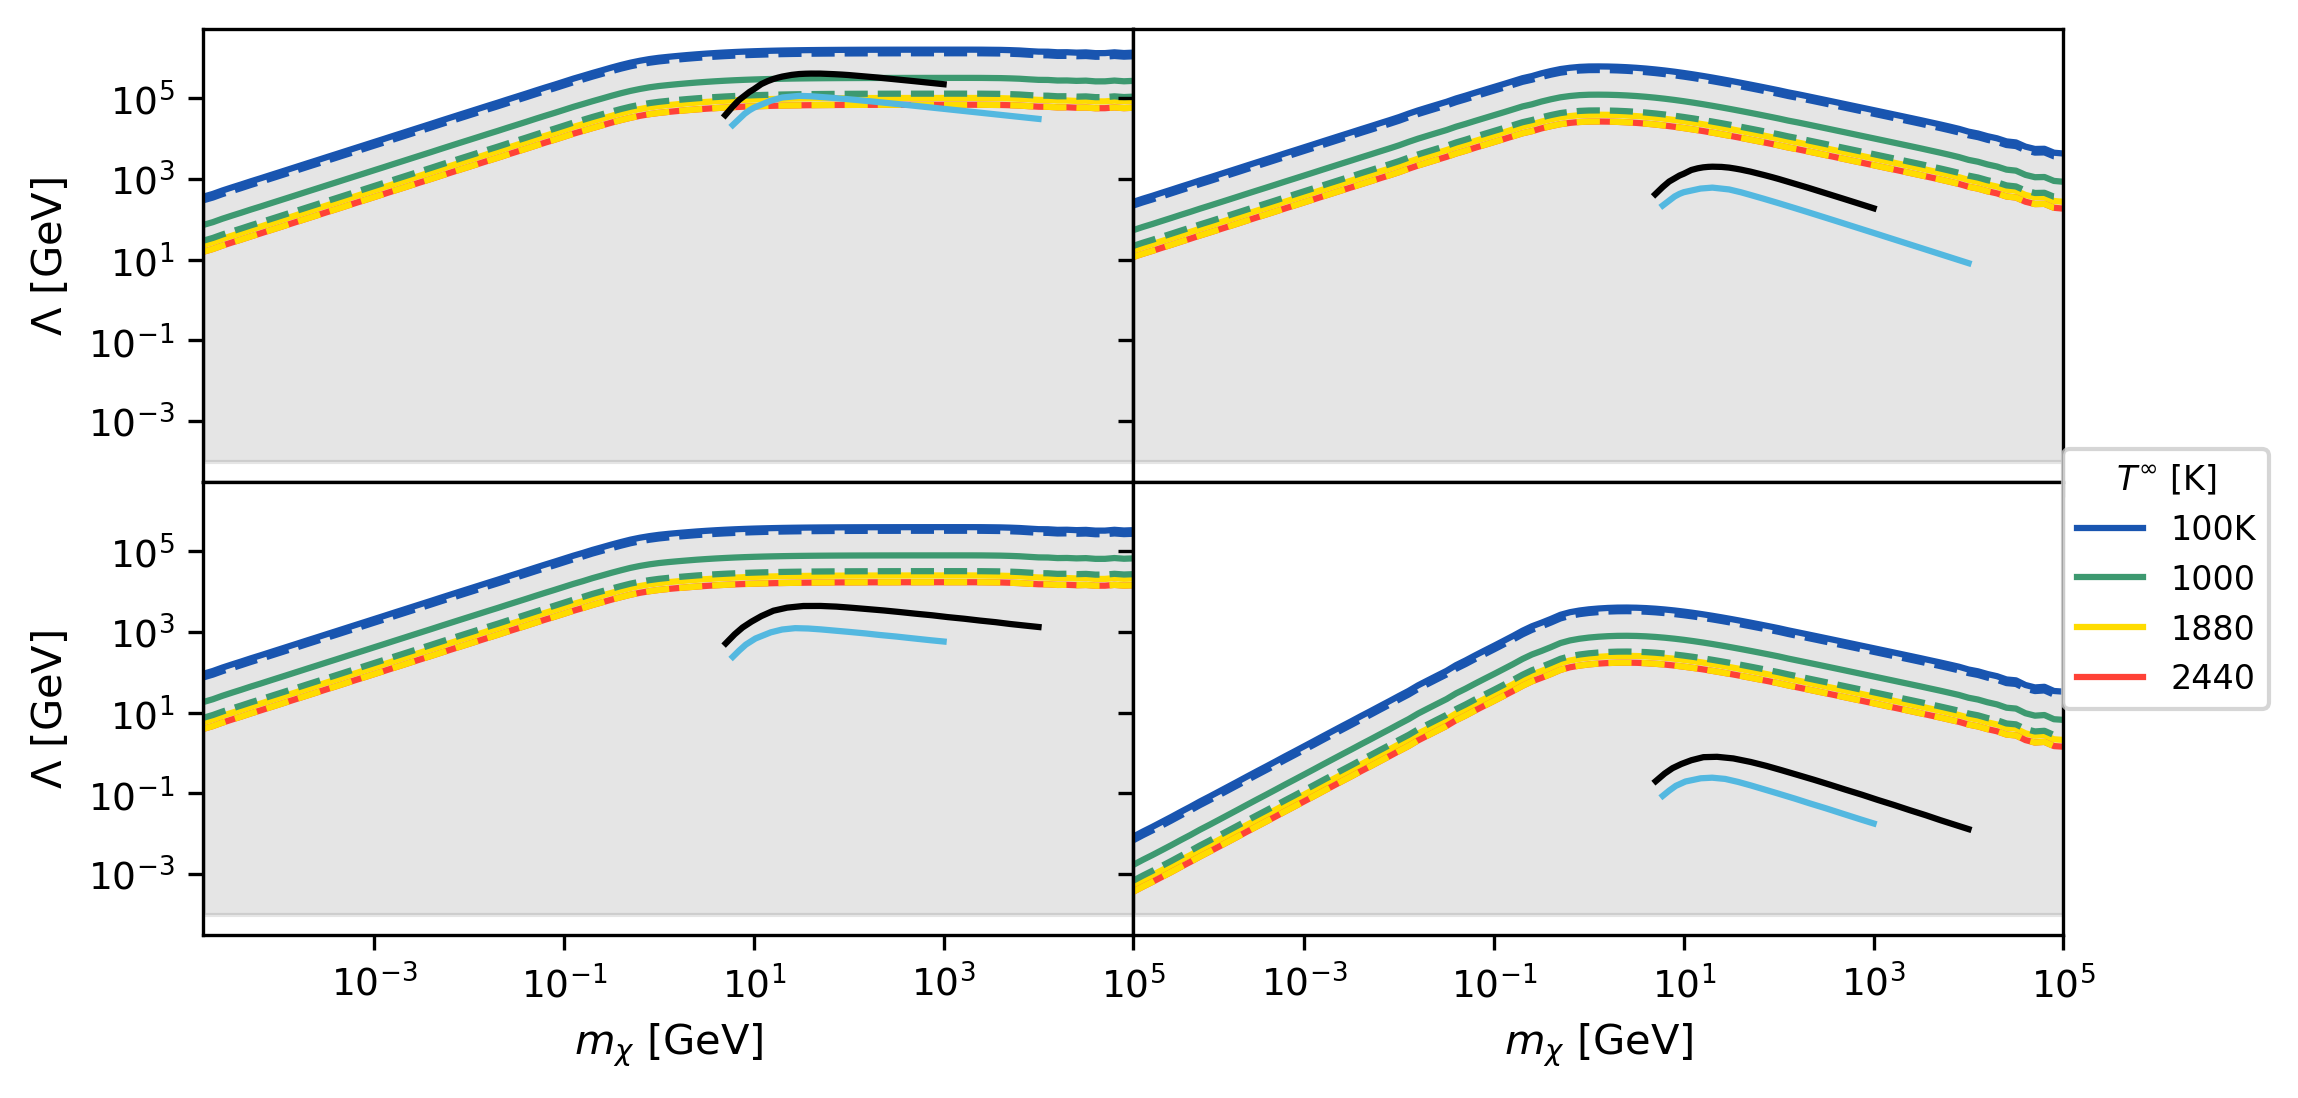

In [16]:
completion()

In [16]:
def ann_compare_heating_plots():
    cols = ['#0098de','#c783e4' ,'#ff6e8d', '#ffa600']
    
    aheatfilesFD = glob.glob('*AheatingFD.dat')

    aheat_dataFD = {}

    for file in aheatfilesFD:
        aheat_dataFD[file.replace('_AheatingFD.dat', '')] = pd.read_csv(file, sep="\t", header = None)
        
    aheatfiles = glob.glob('*Aheating.dat')

    aheat_data = {}

    for file in aheatfiles:
        aheat_data[file.replace('_Aheating.dat', '')] = pd.read_csv(file, sep="\t", header = None)
        
    fig, ax = plt.subplots(figsize = (8, 10), ncols=2, nrows =5, sharey = True, sharex = True, dpi = 300)
    fig.subplots_adjust(hspace=0, wspace=0)
    # fig.text(0.5, 0.09, '$m_\chi$ [GeV]', ha='center', va = 'center')
    # fig.text(0.04, 0.5, '$G^2$ [GeV$^{-4}$]', va='center', rotation='vertical')
    i=1
    for m, row in enumerate(ax):
        for n, col in enumerate(row):
            for j in range(len(aheat_data['d'+str(i)].columns))[1:]:
                col.loglog(aheat_data['d'+str(i)][0], aheat_data['d'+str(i)][j], cols[j-1], label = leg_labelsa[j-1], linestyle = '-', alpha = 0.8)
                col.loglog(aheat_dataFD['d'+str(i)][0], aheat_dataFD['d'+str(i)][j], cols[j-1], label = leg_labelsa[j-1], linestyle = ':')
            
            col.text(0.08, 0.9, 'D'+str(i), ha='center', va='center', transform=col.transAxes)
            col.set_xlabel('$m_\chi$ [GeV]')
            col.set_xlim(10**(-4.8), 1e5)
            col.grid(b=True, which='major',  linestyle='--', alpha=0.2)
            if n ==0:
                col.set_ylabel('$\Lambda$ [GeV]')
            if n == 1:
                col.legend(loc = (1, 0.2), shadow = False).set_title(title = '$T^\infty$ [K]', prop={"size": 5})
            i+=1
    plt.savefig('anFDcombined.pdf')
    plt.show()

In [11]:
def ann2compare(i):
    cols = ['#0098de','#c783e4' ,'#ff6e8d', '#ffa600']
    fig, ax = plt.subplots(figsize = (5, 3), sharey = True, sharex = True, dpi = 300)
    fig.subplots_adjust(hspace=0, wspace=0)
    # fig.text(0.5, 0.09, '$m_\chi$ [GeV]', ha='center', va = 'center')
    # fig.text(0.04, 0.5, '$G^2$ [GeV$^{-4}$]', va='center', rotation='vertical')

    for j in range(len(aheat_dataFD['d'+str(i)].columns))[1:]:
        ax.loglog(aheat_data['d'+str(i)][0], aheat_data['d'+str(i)][j], cols[j-1], label = leg_labelsa[j-1]+' no FD', linestyle = '-', alpha = 0.8)
        ax.loglog(aheat_dataFD['d'+str(i)][0], aheat_dataFD['d'+str(i)][j], cols[j-1], label = leg_labelsa[j-1] + ' FD', linestyle = ':')
        
    ax.text(0.08, 0.9, 'D'+str(i), ha='center', va='center', transform=ax.transAxes)
    ax.set_xlabel('$m_\chi$ [GeV]')
    ax.set_xlim(10**(-4.8), 1e5)
#     ax.set_ylim(10**-3.5, 10**6.5)
    ax.legend(loc = 'lower right', shadow = False).set_title(title = '$T^\infty$ [K]', prop={"size": 5})
    ax.grid(b=True, which='major',  linestyle='--', alpha=0.2)
    ax.set_ylabel('$\Lambda$ [GeV]')
    
    plt.savefig('compareAnn.pdf')
    plt.show()

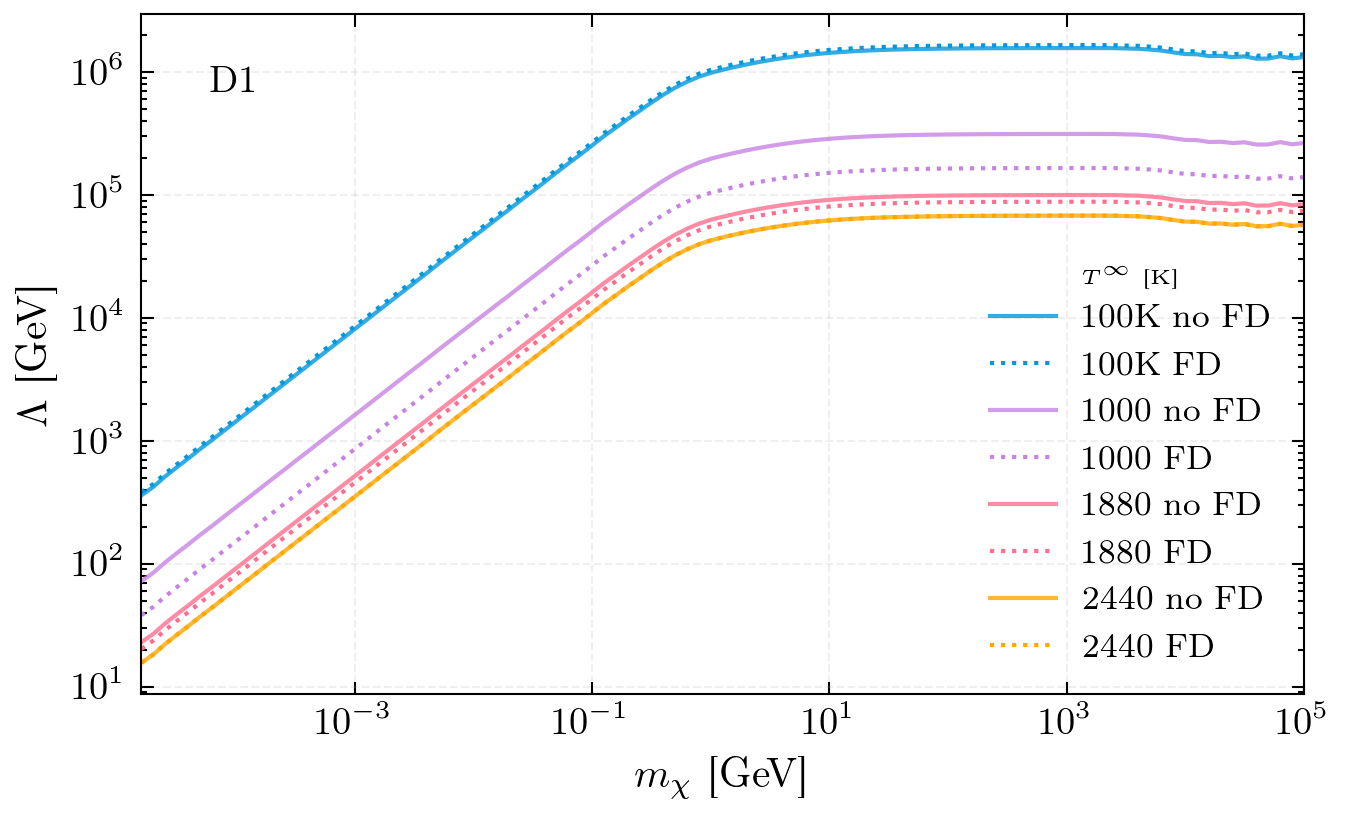

In [19]:
ann2compare(1)